In [1]:
import os,sys
WORKSPACE_DIR = '../..' 
PROJECT_DIR = f'{WORKSPACE_DIR}/barchartapi' 
WORKING_DIR = f'{PROJECT_DIR}/barchartapi' 
if WORKING_DIR not in sys.path:
    sys.path.append(WORKING_DIR)
if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)
if WORKSPACE_DIR not in sys.path:
    sys.path.append(WORKSPACE_DIR)    
import barchart_api as bcapi
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
init_notebook_mode(connected=True)

import datetime
import pandas as pd
import plot_utilities as pu
import datetime
import numpy as np
import warnings
warnings.filterwarnings("ignore")


Barchart OnDemand Client: https://marketdata.websol.barchart.com/
Barchart OnDemand Client: https://marketdata.websol.barchart.com/


In [2]:
import importlib
importlib.reload(pu)

Barchart OnDemand Client: https://marketdata.websol.barchart.com/
Barchart OnDemand Client: https://marketdata.websol.barchart.com/


<module 'plot_utilities' from '/Users/bperlman1/Documents/billybyte/pyliverisk/barchartapi/barchartapi/plot_utilities.py'>

In [3]:
# set this to 'free' or 'paid'
endpoint = 'free' # free or paid

# set the bar_type and the interval
bar_type='daily' # minutes, daily, monthly
interval=1 # 1,5,15,30,60

# create an instance 
api_key = open(f'./temp_folder/{endpoint}_api_key.txt','r').read()
endpoint_type=f'{endpoint}_url'
bch = bcapi.BcHist(api_key, bar_type=bar_type, interval=interval,endpoint_type = endpoint_type)


Barchart OnDemand Client: https://marketdata.websol.barchart.com/


In [10]:
df_cb = bch.get_history('CLU19',20190610,20190628)


In [11]:
df_cb[1]

,symbol,timestamp,tradingDay,open,high,low,close,volume,openInterest
0,CLU19,2019-07-26T00:00:00-05:00,2019-07-26,55.93,56.57,55.68,56.20,476785,410680
1,CLU19,2019-07-29T00:00:00-05:00,2019-07-29,56.20,57.10,55.81,56.87,529742,411795
2,CLU19,2019-07-30T00:00:00-05:00,2019-07-30,57.07,58.47,56.96,58.05,547401,406009
3,CLU19,2019-07-31T00:00:00-05:00,2019-07-31,58.34,58.82,57.81,58.58,614001,402392
4,CLU19,2019-08-01T00:00:00-05:00,2019-08-01,57.85,57.99,53.59,53.95,886748,403715
5,CLU19,2019-08-02T00:00:00-05:00,2019-08-02,54.54,56.05,54.15,55.66,739810,399849
6,CLU19,2019-08-05T00:00:00-05:00,2019-08-05,55.38,55.61,54.22,54.69,823844,384410
7,CLU19,2019-08-06T00:00:00-05:00,2019-08-06,54.95,55.42,53.29,53.63,682794,381492
8,CLU19,2019-08-07T00:00:00-05:00,2019-08-07,53.42,53.77,50.52,51.09,1063214,344560
9,CLU19,2019-08-08T00:00:00-05:00,2019-08-08,52.33,53.06,51.94,52.54,724762,301000


In [6]:
yy = str(datetime.datetime.now().year)[2:]
mm = datetime.datetime.now().month
if mm > 6:
    yy = str(int(yy) + 1)
short_name = f'CLZ{yy}'
days_to_fetch = 120

dt_end = datetime.datetime.now()
dt_beg = dt_end - datetime.timedelta(days_to_fetch)
beg_yyyymmdd = '%04d%02d%02d' %(dt_beg.year,dt_beg.month,dt_beg.day)#20181201
end_yyyymmdd = '%04d%02d%02d' %(dt_end.year,dt_end.month,dt_end.day)#20190219

tup = bch.get_history(short_name, beg_yyyymmdd, end_yyyymmdd)
print(f'get_history: {short_name} WRITING DATA {datetime.datetime.now()}')
df_hist = tup[1]
def __full_date(d):
    year = int(str(d)[0:4])
    month = int(str(d)[5:7])
    day = int(str(d)[8:10])
    hour = int(str(d)[11:13])
    minute = int(str(d)[14:16])
    dt = datetime.datetime(year,month,day,hour,minute)
    return(dt)
    
df_hist['date'] = df_hist.timestamp.apply(__full_date)
print(f'get_history: {short_name} END {datetime.datetime.now()}')
df_hist.tail()

get_history: CLZ20 WRITING DATA 2020-01-09 20:02:56.879837
get_history: CLZ20 END 2020-01-09 20:02:56.886453


,symbol,timestamp,tradingDay,open,high,low,close,volume,openInterest,date
79,CLZ20,2020-01-03T00:00:00-06:00,2020-01-03,56.92,58.91,56.90,57.97,116734,243164,2020-01-03
80,CLZ20,2020-01-06T00:00:00-06:00,2020-01-06,58.49,58.72,57.62,58.18,74287,248697,2020-01-06
81,CLZ20,2020-01-07T00:00:00-06:00,2020-01-07,57.87,58.25,57.43,58.07,46334,251109,2020-01-07
82,CLZ20,2020-01-08T00:00:00-06:00,2020-01-08,58.30,59.51,55.35,55.75,106663,251760,2020-01-08
83,CLZ20,2020-01-09T00:00:00-06:00,2020-01-09,55.89,56.26,55.23,55.93,46314,0,2020-01-09


___
### Create Candlestick charts for each day's 30 minute intra-day data
___

In [7]:
if endpoint != 'free':
    for day in df_hist.tradingDay.unique():
        try:
            fig,axs = pu.candles(df_hist[df_hist.tradingDay==day])
            plt.rcParams.update({'figure.max_open_warning': 0})
        except Exception as e:
            print(f'ERROR FOR DAY {day}')
            print(str(e))


### Show a barchart of the  daily history of percent changes between CLX19 and XLE

In [16]:
beg_yyyymmdd
# status,df_clx19 = bch.get_history('CLX19',20190801,20191001)
# status,df_xle = bch.get_history('XLE',20190801,20191001)
status,df_xle = bch.get_history('XLE',beg_yyyymmdd,end_yyyymmdd)
# df_clx19['pct_cl'] = df_clx19.close.pct_change()
df_hist['pct_cl'] = df_hist.close.pct_change()
df_xle['pct_xle'] = df_xle.close.pct_change()

In [17]:
df_xle

,symbol,timestamp,tradingDay,open,high,low,close,volume,openInterest,pct_xle
0,XLE,2019-09-11T00:00:00-04:00,2019-09-11,58.94212,59.40396,58.35521,58.67271,23646714,None,NaN
1,XLE,2019-09-12T00:00:00-04:00,2019-09-12,57.93185,58.73478,57.45077,58.30709,19809008,None,-0.006232
2,XLE,2019-09-13T00:00:00-04:00,2019-09-13,58.69196,59.07683,58.44180,58.76894,14614464,None,0.007921
3,XLE,2019-09-16T00:00:00-04:00,2019-09-16,61.23207,61.24170,60.03995,60.74137,31884194,None,0.033562
4,XLE,2019-09-17T00:00:00-04:00,2019-09-17,60.77985,60.79910,59.49055,59.89466,27514146,None,-0.013940
...,...,...,...,...,...,...,...,...,...,...
79,XLE,2020-01-03T00:00:00-05:00,2020-01-03,61.13000,61.31000,60.10000,60.40000,29515600,None,-0.002971
80,XLE,2020-01-06T00:00:00-05:00,2020-01-06,60.61000,61.18000,60.40000,60.87000,22460700,None,0.007781
81,XLE,2020-01-07T00:00:00-05:00,2020-01-07,60.70000,60.77000,60.00000,60.71000,11486700,None,-0.002629
82,XLE,2020-01-08T00:00:00-05:00,2020-01-08,60.65000,60.72000,59.63000,59.71000,19038000,None,-0.016472


In [18]:
df_both = df_clx19[['tradingDay','pct_cl']].merge(df_xle[['tradingDay','pct_xle']],on='tradingDay',how='inner')

In [19]:
df_both

,tradingDay,pct_cl,pct_xle
0,2019-09-11,-0.028277,NaN
1,2019-09-12,-0.011137,-0.006232
2,2019-09-13,-0.004541,0.007921
3,2019-09-16,0.143613,0.033562
4,2019-09-17,-0.056965,-0.013940
5,2019-09-18,-0.017936,-0.004819
6,2019-09-19,0.002584,-0.002583
7,2019-09-20,-0.001719,0.000816
8,2019-09-23,0.009468,0.000326
9,2019-09-24,-0.023022,-0.015824


In [29]:
f = pu.plotly_pandas(df_both,'tradingDay',bar_plot=True,alt_yaxis=False,plot_title="CL vs XLE Percent Changes")
iplot(f)

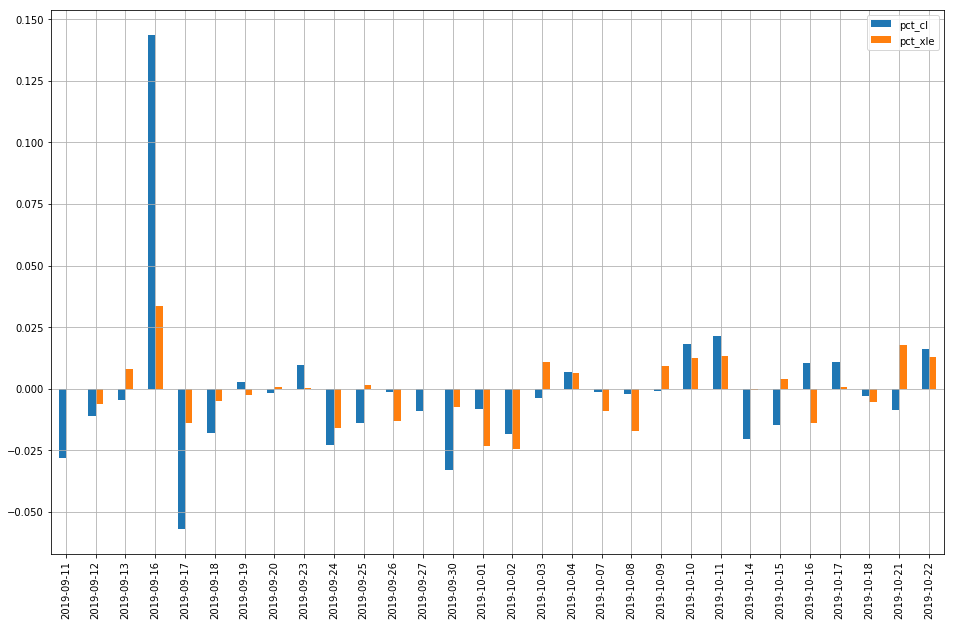

In [21]:
f2 = pu.plot_pandas(df_both,'tradingDay',bar_plot=True,alt_yaxis=False,)

### End

In [28]:
??pu.plotly_pandas